## Task 1 — Height and Weight Analysis

You are given data about people's height and weight stored in a CSV file `rost_ves.csv`.

### Objectives:
- Create a list of heights and a list of weights.
- Plot a scatter chart where:
  - X-axis represents height
  - Y-axis represents weight
- Add axis labels and the title **"Weight vs Height"**.
- Make the points green.
- Display the plot.
- Train a model that can predict **weight based on height**.
- Output the evaluation metrics.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
data = pd.read_csv("rost_ves.csv", header=None, names=["Height", "Weight"])
print(data.head())
print(data.dtypes)


      Height    Weight
0  Рост (см)  Вес (кг)
1        150        45
2        152        47
3        155        50
4        157        52
Height    object
Weight    object
dtype: object


In [7]:
data["Height"] = pd.to_numeric(data["Height"], errors="coerce")
data["Weight"] = pd.to_numeric(data["Weight"], errors="coerce")

data = data.dropna()

heights = data["Height"]
weights = data["Weight"]

print(data.head())
print(data.dtypes)


   Height  Weight
1   150.0    45.0
2   152.0    47.0
3   155.0    50.0
4   157.0    52.0
5   160.0    54.0
Height    float64
Weight    float64
dtype: object


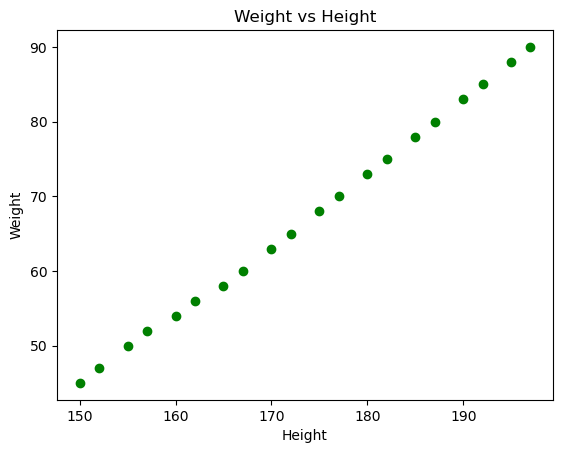

In [8]:
plt.figure()
plt.scatter(heights, weights, color="green")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Weight vs Height")
plt.show()


In [9]:
X = heights.values.reshape(-1, 1)
y = weights.values

model = LinearRegression()
model.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
y_pred = model.predict(X)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)


MAE: 0.411580217129071
MSE: 0.23715319662243567
R2 Score: 0.9987478711899554


## Task 5 — Temperature During the Day

You are given temperature data during a day:

- Hours: [0, 4, 8, 12, 16, 20, 24]
- Temperature: [15, 14, 18, 22, 25, 20, 17]

### Objectives:
- Create a list of hours and a list of temperatures.
- Plot a line chart showing the change of temperature over time.
- Add the title **"Temperature During the Day"** and axis labels.
- Enable the grid on the plot.
- Train a model that can approximately predict temperature based on hours.
- Display the results.
- Output evaluation metrics.


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [18]:
time_hours = np.array([0, 4, 8, 12, 16, 20, 24])
temp_values = np.array([15, 14, 18, 22, 25, 20, 17])

print("Time (hours):", time_hours)
print("Temperature:", temp_values)


Time (hours): [ 0  4  8 12 16 20 24]
Temperature: [15 14 18 22 25 20 17]


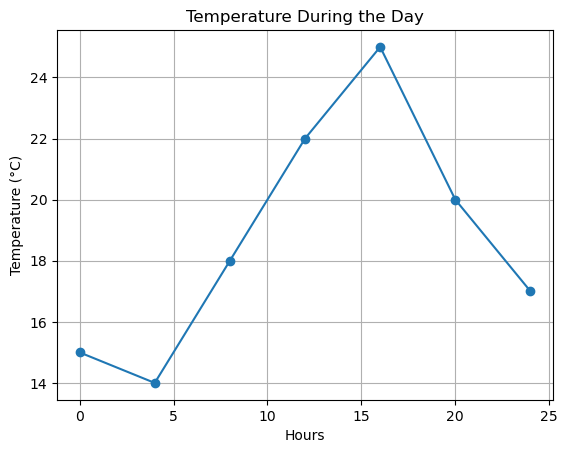

In [19]:
plt.figure()
plt.plot(time_hours, temp_values, marker='o')
plt.xlabel("Hours")
plt.ylabel("Temperature (°C)")
plt.title("Temperature During the Day")
plt.grid(True)
plt.show()


In [20]:
X_time = time_hours.reshape(-1, 1)
y_temperature = temp_values

reg = LinearRegression()
reg.fit(X_time, y_temperature)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
predicted = reg.predict(X_time)

mae = mean_absolute_error(y_temperature, predicted)
mse = mean_squared_error(y_temperature, predicted)
r2 = r2_score(y_temperature, predicted)

print("Model evaluation:")
print("MAE:", round(mae, 3))
print("MSE:", round(mse, 3))
print("R2:", round(r2, 3))


Model evaluation:
MAE: 2.531
MSE: 9.872
R2: 0.244


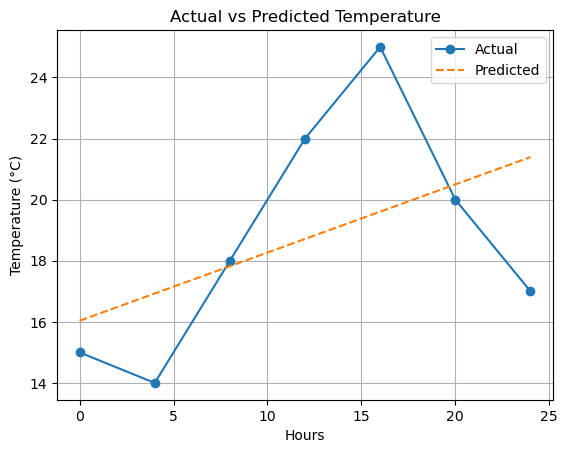

In [22]:
plt.figure()
plt.plot(time_hours, y_temperature, label="Actual", marker='o')
plt.plot(time_hours, predicted, label="Predicted", linestyle='--')
plt.xlabel("Hours")
plt.ylabel("Temperature (°C)")
plt.title("Actual vs Predicted Temperature")
plt.legend()
plt.grid(True)
plt.show()
